In [2]:
!pip install scipy
!pip install statsmodels

In [3]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns

/var/folders/8p/ft1k5gt143qc3r7v0q4q31dm0000gn/T/ipykernel_1136/1459347747.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
dataset = datasets.fetch_california_housing()
data = dataset.target

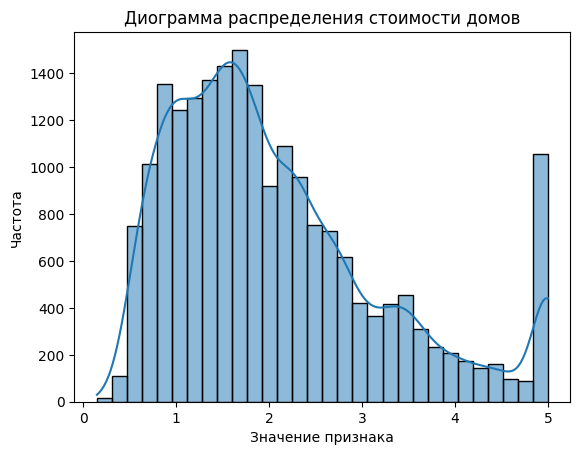

In [5]:
ax = sns.histplot(data, bins=30, kde=True)
ax.set(xlabel='Значение признака', ylabel='Частота')
plt.title('Диограмма распределения стоимости домов')
plt.show()

In [11]:
import statsmodels.api as sm

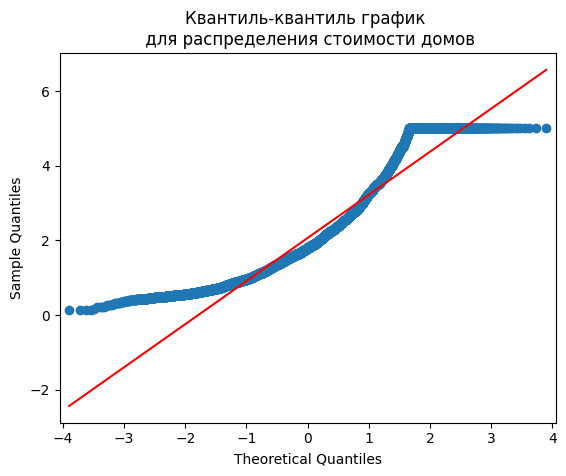

In [15]:
sm.qqplot(data, line='s')
plt.title('Квантиль-квантиль график \n для распределения стоимости домов')
plt.show()

In [1]:
import scipy.stats as stats

In [2]:
alpha = 0.05

In [3]:
data = [31, 38, 30, 58, 40, 36, 38, 44, 43, 39, 36, 41, 37, 20, 38, 35, 38, 11, 42, 34]

In [11]:
data2 = [12,  8,  9, 10, 11, 12,  7, 12,  2, 10,  3,  9, 18, 4, 11, 13, 13, 17, 14,  3, 10,  2,  2,  7, 14,  8, 20,  5,  7, 10]

In [8]:
_, p = stats.shapiro(data)

In [9]:
print('p-value = %.3f' % (p))

p-value = 0.015


In [10]:
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

Распределение не нормальное


In [13]:
_, p = stats.shapiro(data2)
print('p-value = %.2f' % (p))
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.41
Распределение нормальное


In [5]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34]

# проводим тест
_, p = stats.ttest_1samp(data, popmean=40, alternative='greater')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.103
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [1]:
import scipy.stats as stats
import numpy as np
alpha = 0.05
data_zaryad = np.array([41,38,40,46,40,46,41,44,43,39,36,41,37,45,38,45,38,48,42,34])
data_planeta = np.array([40,39,42,46,41,46,42,45,44,42,38,42,38,46,39,46,40,41,43,36])

print('Тест на равенство дисперсий')
result = stats.levene(data_planeta, data_zaryad)
p = result[1]
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_in нудно использовать параметр equal_var=True.')

print('\n Тест на равенство средних')
_, p = stats.ttest_ind(data_planeta, data_zaryad, alternative='greater', equal_var=True)

print('p-value ={:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезуб.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергать нулевую гимпотезу.'.format(alpha))

Тест на равенство дисперсий
p-value = 0.340
Дисперсии одинаковы, в stats.ttest_in нудно использовать параметр equal_var=True.

 Тест на равенство средних
p-value =0.260
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергать нулевую гимпотезу.


In [2]:
import scipy.stats as stats
alpha = 0.05
group_zaryad = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
group_planeta = [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43]
group_energiya = [35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43]

print('Тест на равенство дисперсий')
result = stats.levene(group_zaryad, group_planeta, group_energiya)
p = result[1]
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

print('\n Тест на равенство в группах')
_, p = stats.f_oneway(group_zaryad, group_energiya, group_planeta)
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Тест на равенство дисперсий
p-value = 0.303
Дисперсии одинаковы, мы можем использовать тест ANOVA

 Тест на равенство в группах
p-value = 0.141
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [1]:
import scipy.stats as stats
import numpy as np
alpha = 0.05

data_zaryad = np.array([41, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46])
data_planeta = np.array([45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42])

_, p = stats.ttest_rel(data_planeta, data_zaryad, alternative='greater')
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [2]:
import pandas as pd
import numpy as np
from statsmodels.stats.anova import AnovaRM
alpha = 0.05

data = pd.DataFrame({'group': np.repeat(['Заряд', 'Планета', 'Энергия'], 5),
                          'object_id': np.tile([1, 2, 3, 4, 5], 3),                          
                          'value': [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52]})

print(AnovaRM(data=data, depvar='value', subject='object_id', within=['group']).fit())

              Anova
      F Value Num DF Den DF Pr > F
----------------------------------
group  0.0100 2.0000 8.0000 0.9900



In [6]:
data = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# проводим тест
_, p = stats.ttest_1samp(data, popmean=40, alternative='less')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.018
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [7]:
data_north = [117, 107, 29, 121, 86, 35, 117, 136, 89, 102, 131, 114, 118, 145, 67, 16, 102, 52, 144, 35, 72, 36, 103, 63, 73]
data_south = [56, 74, 94, 29, 76, 76, 61, 76, 65, 69, 78, 17, 65, 21, 35, 87, 53, 32, 18, 74, 28, 23, 67, 16, 98]
data_east = [141, 109, 120, 93, 57, 96, 84, 127, 130, 85, 99, 53, 51, 55, 103, 53, 103, 142, 112, 67, 139, 93, 83, 123, 111]

alpha = 0.05

print('Тест на равенство дисперсий')
result = stats.levene(data_north, data_south, data_east)
p = result[1]
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

print('\n Тест на равенство в группах')
_, p = stats.f_oneway(data_north, data_south, data_east)
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Тест на равенство дисперсий
p-value = 0.150
Дисперсии одинаковы, мы можем использовать тест ANOVA

 Тест на равенство в группах
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [8]:
import scipy.stats as stats
import numpy as np
alpha = 0.05

data_before = [21, 19, 25, 18, 32, 10, 26, 25, 35, 26, 23, 37, 30, 40, 29, 35, 28, 39, 26, 32, 40, 29, 44, 34, 37, 12, 37, 23, 33, 42]
data_after = [23, 17, 41, 25, 9, 22, 18, 42, 27, 29, 30, 23, 38, 14, 27, 29, 28, 18, 19, 26, 29, 25, 32, 26, 47, 50, 30, 30, 36, 16]

_, p = stats.ttest_rel(data_before, data_after, alternative='greater')
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.213
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [2]:
from statsmodels.stats.descriptivestats import sign_test

alpha =  0.05

data = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]

_, p = sign_test(data, 60)
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [1]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_chat_bot = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]
data_operator = [72, 80, 66, 72, 75, 71, 73, 71, 75, 68, 63, 68, 62, 65, 77, 66, 67, 62, 60, 74, 61, 67, 61, 63, 62, 79, 61, 63, 62, 63]

# проводим тест
_, p = stats.mannwhitneyu(data_chat_bot, data_operator)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [2]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_chat_bot = [71, 97, 71, 97, 83, 90, 83, 94, 88, 76, 79, 99, 82, 85, 93, 78, 76, 87, 73, 72, 89, 89, 71, 86, 78, 93, 86, 95, 83, 73]
data_operator = [114, 112, 115, 124, 101, 108, 104, 109, 103, 115, 100, 129, 120, 129, 117, 125, 112, 105, 128, 107, 120, 108, 129, 100, 116, 105, 128, 128, 120, 106]

# проводим тест
_, p = stats.wilcoxon(data_chat_bot, data_operator, alternative = 'less')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [3]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_basic = [106, 96, 105, 119, 91, 118, 108, 98, 103, 102, 98, 97, 104, 100, 94, 94, 98, 103, 95, 93, 118, 91, 96, 115, 119, 111, 102, 118, 91, 98 ]
data_silver = [96, 95, 102, 103, 96, 120, 97, 112, 108, 90, 99, 93, 91, 91, 119, 95, 110, 108, 117, 99, 100, 99, 119, 98, 101, 95, 118, 110, 114, 116]
data_gold = [99, 106, 92, 97, 98, 95, 119, 120, 116, 93, 102, 109, 98, 99, 100, 113, 91, 96, 119, 96, 95, 112, 111, 110, 102, 112, 105, 93, 111, 111]

# проводим тест
_, p = stats.kruskal(data_basic, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.837
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [4]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_basic = [113, 115, 108, 104, 107, 96, 114, 103, 103, 120, 92, 103, 120, 100, 110, 106, 112, 99, 118, 113, 102, 94, 92, 109, 91, 113, 95, 107, 110, 103]
data_silver = [89, 80, 95, 77, 82, 98, 84, 83, 73, 93, 89, 78, 90, 73, 83, 73, 84, 90, 75, 75, 86, 88, 72, 72, 96, 75, 87, 99, 80, 82]
data_gold = [62, 84, 67, 71, 64, 89, 65, 70, 86, 77, 84, 81, 89, 68, 87, 70, 70, 61, 82, 79, 60, 62, 88, 61, 76, 87, 79, 90, 77, 65]

# проводим тест
_, p = stats.friedmanchisquare(data_basic, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [6]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_before = [51, 46, 40, 48, 44, 42, 48, 36, 44, 35, 42, 52, 38, 33, 40, 43, 51, 38, 36, 47, 42, 44, 47, 36, 41, 46, 33, 51, 49, 41]
data_after = [46, 44, 47, 51, 52, 37, 46, 49, 45, 40, 32, 41, 48, 36, 37, 39, 37, 42, 46, 38, 42, 35, 41, 41, 42, 33, 47, 49, 36, 37]

# проводим тест
_, p = stats.wilcoxon(data_before, data_after, alternative = 'less')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.742
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [7]:
from statsmodels.stats.descriptivestats import sign_test

alpha =  0.05

data = [77, 78, 74, 81, 87, 73, 80, 72, 73, 81, 88, 74, 74, 79, 78, 73, 89, 82, 77, 77, 88, 75, 80, 88, 72, 84, 88, 74, 74, 78]

_, p = sign_test(data, 75)
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.136
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [8]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_tariffs = [57, 56, 64, 62, 64, 63, 57, 64, 57, 63, 62, 59, 61, 61, 62, 57, 55, 60, 56, 62, 64, 56, 62, 62, 65]
data_offers = [56, 56, 60, 64, 62, 63, 63, 56, 64, 60, 58, 61, 59, 63, 62, 63, 59, 64, 63, 58, 61, 61, 62, 55, 61]
data_support = [65, 67, 65, 69, 66, 65, 62, 63, 65, 69, 64, 61, 69, 69, 62, 68, 65, 69, 62, 67, 63, 69, 63, 67, 61]

# проводим тест
_, p = stats.friedmanchisquare(data_tariffs, data_offers, data_support)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [1]:
import scipy.stats as stats
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.read_csv('cat_variables_tarif_children.csv')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['Тариф'], data['Наличие детей'])

# проводим тест
_, p, _, _ = stats.chi2_contingency(table)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.373
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


/var/folders/8p/ft1k5gt143qc3r7v0q4q31dm0000gn/T/ipykernel_1925/3506225188.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
